# Visualization that shows in how many posts and comments two technologies appeared together

In [8]:
import datetime
import sqlite3
import pdb
import time
import pandas as pd
import numpy as np
import ast
import json
from matplotlib import pyplot as plt
from matplotlib import rcParams
import seaborn as sns


conn = sqlite3.connect('C:\\MeinCode\\reddit_scraper\\reddit.db')
#conn = sqlite3.connect(':memory:')

curs = conn.cursor()

In [14]:
curs.execute("""
            SELECT id, tech_list
            FROM techs_extracted_V1
            """)
all_content = curs.fetchall()
all_lists = []

# literal_eval makes makes a python list out of the string "['abc','cde']" -> ['abc', 'cde']
for _, content in all_content:
    all_lists.append(ast.literal_eval(content))
    

with open("C:\\MeinCode\\reddit_scraper\\technologies_V1.json") as json_file:
        technologies_json = json.load(json_file)
tech_set = technologies_json.keys()
tech_set = [x for x in tech_set]
tech_set.sort()

In [15]:
def get_count(tech_1, tech_2):
    count = 0
    for techs_in_comment in all_lists:
        if tech_1 in techs_in_comment and tech_2 in techs_in_comment:
            count = count + 1
    return count

In [16]:
all_data = []
for i in range(len(tech_set)):
    for j in range(i, len(tech_set)):
        count = get_count(tech_set[i], tech_set[j])
        all_data.append([tech_set[i], tech_set[j], count])
        

In [17]:
data_df = pd.DataFrame(data=all_data, columns=['Tech1', 'Tech2', 'count'])
data_df = data_df.pivot('Tech1','Tech2','count')
data_df = data_df.fillna(0)


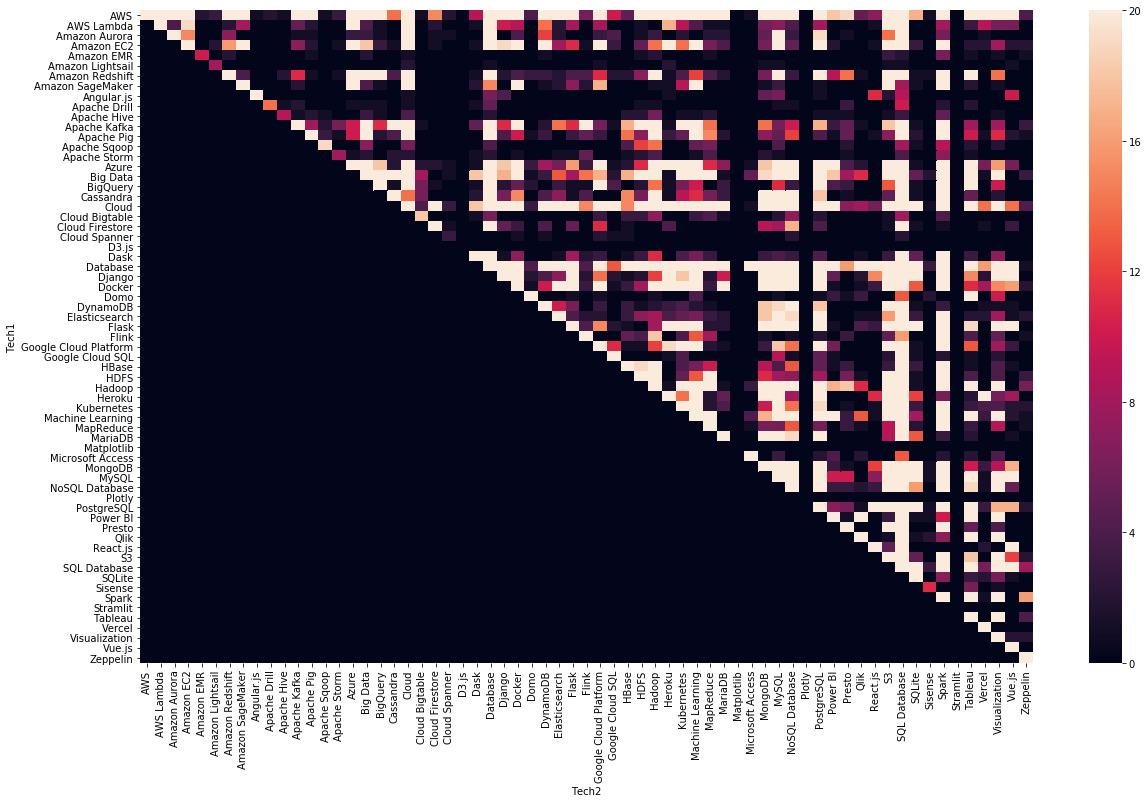

In [18]:
fig, ax = plt.subplots(figsize= (20,12))
ax = sns.heatmap(data_df, vmin=0, vmax=20, xticklabels=True, yticklabels=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig.savefig('Visualizations\heatmap.png', transparent=True, dpi=300, bbox_inches="tight")


In [19]:
conn.close()